# Computer Vision Project: Data Augmentation

The following three data augmentation techniques will applied to the moonrock dataset to enhance the performance of the object detection model:
1. Perspective adaptation (increasing adaptability to varying perspectives)
2. Intensity adjustments (increasing robustness to variations of illumination)
3. Pixel Sampling (increasing amount of images with varying resolutions)

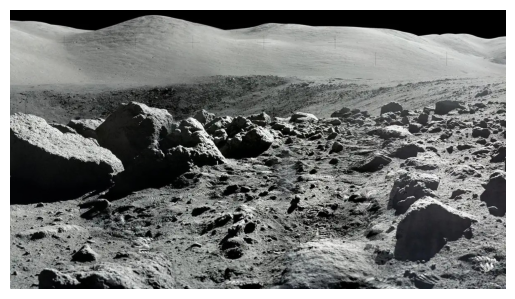

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_display_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

file_path = '/home/korneel/Documents/cv_project/input/test.jpg'
image = load_and_display_image(file_path)

### 1. Perspective Adaptation

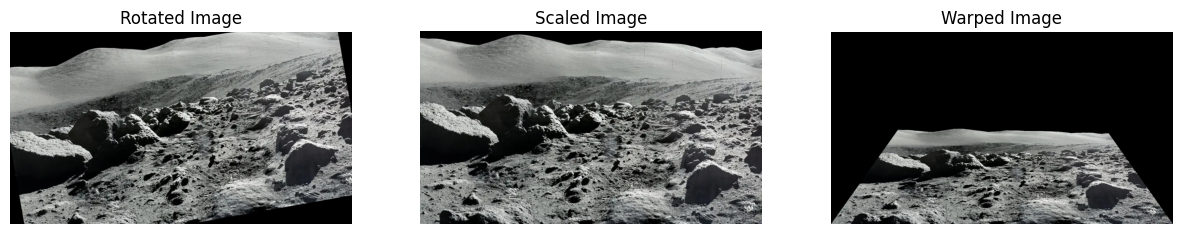

In [7]:
def perspective_adaptation(image):
    rows, cols, _ = image.shape
    
    # Rotation
    R = cv2.getRotationMatrix2D((cols/2, rows/2), 10, 1)
    rotated_image = cv2.warpAffine(image, R, (cols, rows))
    
    # Scaling
    scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    
    # Perspective Transformation
    src_points = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
    dst_points = np.float32([[cols*0.2, rows*0.5], [cols*0.8, rows*0.5], [0, rows], [cols, rows]])
    T = cv2.getPerspectiveTransform(src_points, dst_points)
    warped_image = cv2.warpPerspective(image, T, (cols, rows))
    
    return rotated_image, scaled_image, warped_image

rotated_image, scaled_image, warped_image = perspective_adaptation(image)

# show perspective adaptations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Rotated Image')
plt.imshow(rotated_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Scaled Image')
plt.imshow(scaled_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Warped Image')
plt.imshow(warped_image)
plt.axis('off')

plt.show()

### 2. Intensity change

(-0.5, 1199.5, 674.5, -0.5)

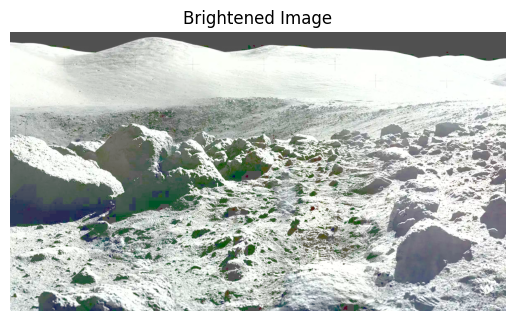

In [3]:
def change_brightness(image, value_increase):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)

    v = cv2.add(v, value_increase)
    v = np.clip(v, 0, 255)
    brightened_image = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)
    return brightened_image

value_increase = 80
brightened_image = change_brightness(image, value_increase)

# show brightness change
plt.figure()
plt.title('Brightened Image')
plt.imshow(brightened_image)
plt.axis('off')

### 3. Histogram Equalization

### 4. Pixel Sampling

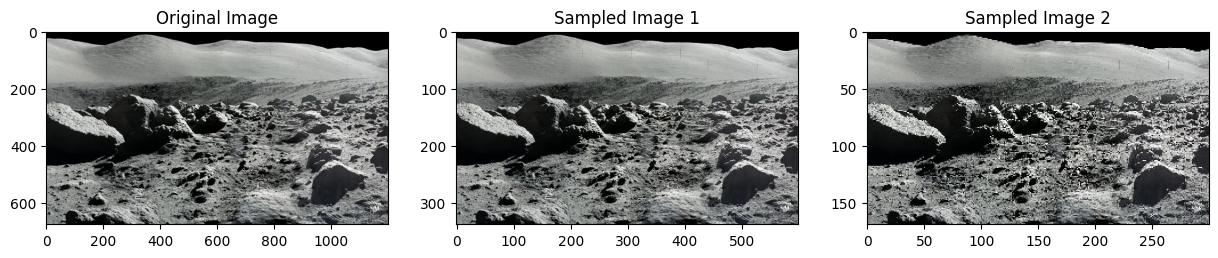

In [4]:
def pixel_sampling(image, factor):
    sampled_image = image[::factor, ::factor]
    return sampled_image

factor1 = 2
factor2 = 4
sampled_image1 = pixel_sampling(image, factor1)
sampled_image2 = pixel_sampling(image, factor2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title(f'Sampled Image 1')
plt.imshow(sampled_image1)

plt.subplot(1, 3, 3)
plt.title(f'Sampled Image 2')
plt.imshow(sampled_image2)

plt.show()